In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Spotify-2000.csv")

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30.0,53.0,-14.0,11.0,68.0,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79.0,50.0,-11.0,17.0,NaN,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69.0,66.0,-9.0,7.0,52.0,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96.0,43.0,-4.0,3.0,37.0,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82.0,58.0,-5.0,10.0,87.0,256,1,3,59


In [4]:
df.shape

(1994, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1994 non-null   object 
 2   Artist                  1994 non-null   object 
 3   Top Genre               1994 non-null   object 
 4   Year                    1994 non-null   int64  
 5   Beats Per Minute (BPM)  1994 non-null   int64  
 6   Energy                  1979 non-null   float64
 7   Danceability            1903 non-null   float64
 8   Loudness (dB)           1934 non-null   float64
 9   Liveness                1960 non-null   float64
 10  Valence                 1909 non-null   float64
 11  Length (Duration)       1994 non-null   object 
 12  Acousticness            1994 non-null   int64  
 13  Speechiness             1994 non-null   int64  
 14  Popularity              1994 non-null   

In [6]:
df.isnull().sum()

Index                      0
Title                      0
Artist                     0
Top Genre                  0
Year                       0
Beats Per Minute (BPM)     0
Energy                    15
Danceability              91
Loudness (dB)             60
Liveness                  34
Valence                   85
Length (Duration)          0
Acousticness               0
Speechiness                0
Popularity                 0
dtype: int64

In [7]:
df.Energy.fillna(76.0,inplace=True)

In [8]:
df.Danceability.bfill(inplace=True)

In [9]:
df['Loudness (dB)'].fillna(-7.0,inplace=True)

In [10]:
df.Liveness.ffill(inplace=True)

In [11]:
df.Valence.fillna(30.0,inplace=True)

In [13]:
condition = df['Length (Duration)'] == '1,121'

# Extract rows based on the condition
result = df[condition]

# Print the result
print(result)

     Index                                              Title Artist  \
904    905  Close to the Edge (i. The Solid Time of Change...    Yes   

      Top Genre  Year  Beats Per Minute (BPM)  Energy  Danceability  \
904  album rock  1972                      81    60.0          67.0   

     Loudness (dB)  Liveness  Valence Length (Duration)  Acousticness  \
904           -7.0      41.0     25.0             1,121            27   

     Speechiness  Popularity  
904            6          47  


In [14]:
df.drop(904,axis=0,inplace=True)

In [15]:
condition = df['Length (Duration)'] == '1,367'

# Extract rows based on the condition
result = df[condition]

# Print the result
print(result)

df.drop(951,axis=0,inplace=True)

     Index                     Title     Artist   Top Genre  Year  \
951    952  Autobahn - 2009 Remaster  Kraftwerk  dance rock  1974   

     Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
951                      82    50.0          33.0          -16.0      13.0   

     Valence Length (Duration)  Acousticness  Speechiness  Popularity  
951     11.0             1,367            11            4          48  


In [16]:
condition = df['Length (Duration)'] == '1,292'

# Extract rows based on the condition
result = df[condition]

# Print the result
print(result)

df.drop(1982,axis=0,inplace=True)

      Index      Title      Artist   Top Genre  Year  Beats Per Minute (BPM)  \
1982   1983  Get Ready  Rare Earth  blues rock  1969                     127   

      Energy  Danceability  Loudness (dB)  Liveness  Valence  \
1982    87.0          41.0           -6.0      83.0     65.0   

     Length (Duration)  Acousticness  Speechiness  Popularity  
1982             1,292             0            4          45  


In [17]:
condition = df['Length (Duration)'] == '1,412'

# Extract rows based on the condition
result = df[condition]

# Print the result
print(result)

df.drop(842,axis=0,inplace=True)

     Index   Title      Artist   Top Genre  Year  Beats Per Minute (BPM)  \
842    843  Echoes  Pink Floyd  album rock  1971                     134   

     Energy  Danceability  Loudness (dB)  Liveness  Valence Length (Duration)  \
842    32.0          28.0          -17.0      11.0     14.0             1,412   

     Acousticness  Speechiness  Popularity  
842            37            4          58  


In [19]:
# Drop non-numeric columns that are not needed for clustering
numeric_data = df.drop(['Index', 'Title', 'Artist', 'Top Genre'], axis=1)

In [20]:
numeric_data

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,2004,157,30.0,53.0,-14.0,11.0,68.0,201,94,3,71
1,2000,135,79.0,50.0,-11.0,17.0,30.0,207,17,7,39
2,2001,168,69.0,66.0,-9.0,7.0,52.0,341,2,17,69
3,2007,173,96.0,43.0,-4.0,3.0,37.0,269,0,4,76
4,2002,106,82.0,58.0,-5.0,10.0,87.0,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...
1989,1958,94,21.0,70.0,-12.0,11.0,72.0,128,84,7,63
1990,1958,175,76.0,36.0,-8.0,76.0,95.0,136,73,6,69
1991,1959,168,80.0,53.0,-9.0,31.0,30.0,162,74,7,74
1992,1959,174,26.0,45.0,-13.0,7.0,60.0,324,54,4,65


In [24]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=12)
    kmeans.fit(numeric_data)
    
    wcss.append(kmeans.inertia_)

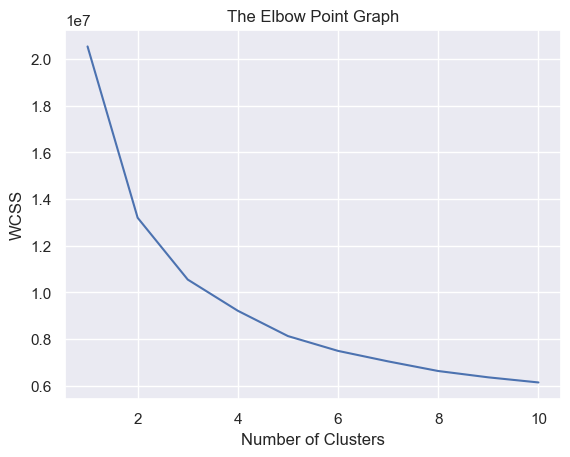

In [25]:
## plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [27]:
# Optimum Number of Clusters = 3

# Training the k-means clustering model

kmeans = KMeans(n_clusters=3,init='k-means++',random_state=12)

In [28]:
# RETURN A LABEL FOR EACH DATA POINTS BASED ON THRIE CLUSTERS
y = kmeans.fit_predict(numeric_data)
print(y)

[1 1 0 ... 1 0 1]


In [33]:
## Visualizing all the clusters
## plotting all the clusters and theie centroids
# 3 clusters = 1,2,3

plt.figure(figsize=(8,8))
plt.scatter(numeric_data[y==0,0],numeric_data[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(numeric_data[y==1,0],numeric_data[y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(numeric_data[y==2,0],numeric_data[y==2,1],s=50,c='yellow',label='Cluster 3')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,
            color='black',label='Centroids')
plt.title("Customer Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

InvalidIndexError: (array([False, False,  True, ..., False,  True, False]), 0)

<Figure size 800x800 with 0 Axes>